# Project : Customer Segmentation

### **Objective**  
TheObjectivel of this project is to **group customers based on their buying habits and personal details**. This helps the company understand customer preferences and create better marketing strategies to boost sales and improve customer experience.

---

### **Dataset Description**  
This dataset contains information about customers, including:  
- **Personal Details**: Age, education, marital status, income, and household size.  
- **Spending**: Money spent on items like wine, meat, and sweets over the last two years.  
- **Marketing Campaigns**: Whether customers responded to promotional offers.  
- **Purchase Channels**: How customers shop—through stores, websites, or cateffo of the project!

### Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Load the dataset.
df = pd.read_excel("marketing_campaign.xlsx")

## Exploratory Data Analysis

### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [89]:
df.drop("ID",axis=1,inplace=True)

### Creating .html file using pandas_profiling to perform EDA.

In [ ]:
import pandas_profiling as pp
eda_report = pp.ProfileReport(df)
eda_report.to_file(output_file="profiling.html")

In [ ]:
import sweetviz as sv
sweet_viz = sv.analyze(df)
sweet_viz.show_html("sweet_viz.html")

In [90]:
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [91]:
# Checking For duplicate Values.
df.duplicated().sum()

182

In [92]:
df.drop_duplicates(inplace=True)

In [93]:
df[df.Income.isna()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


### Handling Missing Values

In [94]:
df.Income.fillna(df.Income.mean(),inplace=True)

In [95]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

### DataType Constraints

In [96]:
df["Year_Birth"] =pd.to_datetime(df["Year_Birth"],format="%Y")

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2058 non-null   datetime64[ns]
 1   Education            2058 non-null   object        
 2   Marital_Status       2058 non-null   object        
 3   Income               2058 non-null   float64       
 4   Kidhome              2058 non-null   int64         
 5   Teenhome             2058 non-null   int64         
 6   Dt_Customer          2058 non-null   datetime64[ns]
 7   Recency              2058 non-null   int64         
 8   MntWines             2058 non-null   int64         
 9   MntFruits            2058 non-null   int64         
 10  MntMeatProducts      2058 non-null   int64         
 11  MntFishProducts      2058 non-null   int64         
 12  MntSweetProducts     2058 non-null   int64         
 13  MntGoldProds         2058 non-nul

In [98]:
df.shape

(2058, 28)

In [99]:
df.size

57624

In [100]:
# Accuracy Check : checking if there any rows with year_enrollment > year_birth

df[df["Dt_Customer"].dt.year < df.Year_Birth.dt.year]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


## Descriptive Analysis

In [101]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.0,2058.0,2058.000000
mean,52357.791544,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.073372,0.076774,0.071914,0.065598,0.012634,0.009718,3.0,11.0,0.152089
std,25377.602472,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,0.260810,0.266297,0.258409,0.247638,0.111714,0.098124,0.0,0.0,0.359195
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,52054.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [19]:
df.skew(numeric_only=True)

Income                  7.099675
Kidhome                 0.621453
Teenhome                0.410660
Recency                 0.002125
MntWines                1.174421
MntFruits               2.108112
MntMeatProducts         2.104580
MntFishProducts         1.930643
MntSweetProducts        2.150130
MntGoldProds            1.905061
NumDealsPurchases       2.439396
NumWebPurchases         1.426380
NumCatalogPurchases     1.950938
NumStorePurchases       0.701512
NumWebVisitsMonth       0.252635
AcceptedCmp3            3.274744
AcceptedCmp4            3.181702
AcceptedCmp5            3.316462
AcceptedCmp1            3.511783
AcceptedCmp2            8.733717
Complain               10.002782
Z_CostContact           0.000000
Z_Revenue               0.000000
Response                1.939054
dtype: float64

In [20]:
df.Z_CostContact.unique()

array([3], dtype=int64)

In [21]:
df.Z_Revenue.unique()

array([11], dtype=int64)

## Feature Selection

#### Dropping the Unnecessary Features(attributes).

2. Z_CostContact (It has the same value for all the records)
3. Z_Revenue (It has the same value for all the records)


In [102]:
df.drop(["Z_CostContact","Z_Revenue"],axis=1,inplace=True)

### Feature Engineering

Creating Two more rows for better understanding about the dataset.

1. **Age** ( Customer age ,2024-year_birth) to know the age of the customer.
2. **Years_Since_Join** ( Number of  years since the customer enrolled in company).
3. **Total_Amnt_Spend** ( Total amount spend by the customer).
7. **No_Of_Childrens** ( Total number of Childrens present in the family).
5. **Is_Parent** ( Is customer a parent or not).
4. **Members_In_Family** ( Total number of members in the family).
6. **Total_Purchases** ( Total purchases done by the customer).


In [103]:
# Creating Age Attribute.
df["Age"] =2024-df["Year_Birth"].dt.year 

In [104]:
# Creating Years_Since_Join Attribute.
df["Years_Since_Join"] = 2024 - df["Dt_Customer"].dt.year

In [105]:
# Creating Total_Amnt_Spend Attribute.
df["Total_Amnt_Spend"] = (df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+
                   df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"])

In [26]:
# Creating No_Of_Childrens in the home feature.
df["No_of_Childrens"] = df["Kidhome"]+df["Teenhome"]

In [27]:
# Creating Is_Parent feature.
df["Is_Parent"] = df["No_of_Childrens"].apply(lambda x : 1 if x> 0 else 0)

In [28]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [29]:
# Creating Members_In_Family feature.
maritial_status_count={
    "Single":1,
    "Together":2,
    "Married":2,
    "Divorced":1,
    "Widow":1,
    "Alone":1,
    "Absurd":1,
    "YOLO":1
}
df["Memebers_In_Family"] = df["No_of_Childrens"]+df["Marital_Status"].apply(lambda x : maritial_status_count[x])

In [30]:
# Creating Total_Purchases feature.
df["Total_Purchase"]=(df[["NumDealsPurchases","NumWebPurchases",
                          "NumCatalogPurchases","NumStorePurchases",
                          "NumWebVisitsMonth"]].agg(sum,axis=1))

In [31]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Age,Years_Since_Join,Total_Amnt_Spend,No_of_Childrens,Is_Parent,Memebers_In_Family,Total_Purchase
0,1957-01-01,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,1,67,12,1617,0,0,1,32
1,1954-01-01,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,70,10,27,2,1,3,11
2,1965-01-01,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,59,11,776,0,0,2,25
3,1984-01-01,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,40,10,53,1,1,3,14
4,1981-01-01,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,43,10,422,1,1,3,24


## Deleting redundent attributes
1. Year_Birth
2. Kidhome
3. Teenhome
4. Dt_Customer


In [32]:
df.drop(["Year_Birth","Kidhome","Teenhome","Dt_Customer"],axis=1,inplace=True)

In [33]:
df.Marital_Status.value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Hence Alone,Absured,YOLO have very low number of records so remove them , and also merge the Married and Together classes.


In [34]:
df=df[~df["Marital_Status"].isin(["Alone","Absurd","YOLO"])]

In [35]:
df.Marital_Status.value_counts()

Married     795
Together    521
Single      448
Divorced    216
Widow        71
Name: Marital_Status, dtype: int64

In [36]:
df["Marital_Status"] = df["Marital_Status"].apply(lambda x : "Married" if x=="Togther" else x)

In [37]:
df["Marital_Status"] = df["Marital_Status"].apply(lambda x : "Single" if x != "Married" else x)

In [38]:
df.Marital_Status.value_counts()

Single     1256
Married     795
Name: Marital_Status, dtype: int64

In [39]:
df.Education.value_counts()

Graduation    1028
PhD            447
Master         339
2n Cycle       188
Basic           49
Name: Education, dtype: int64

## Visualization

### Histogram of Each Feature.

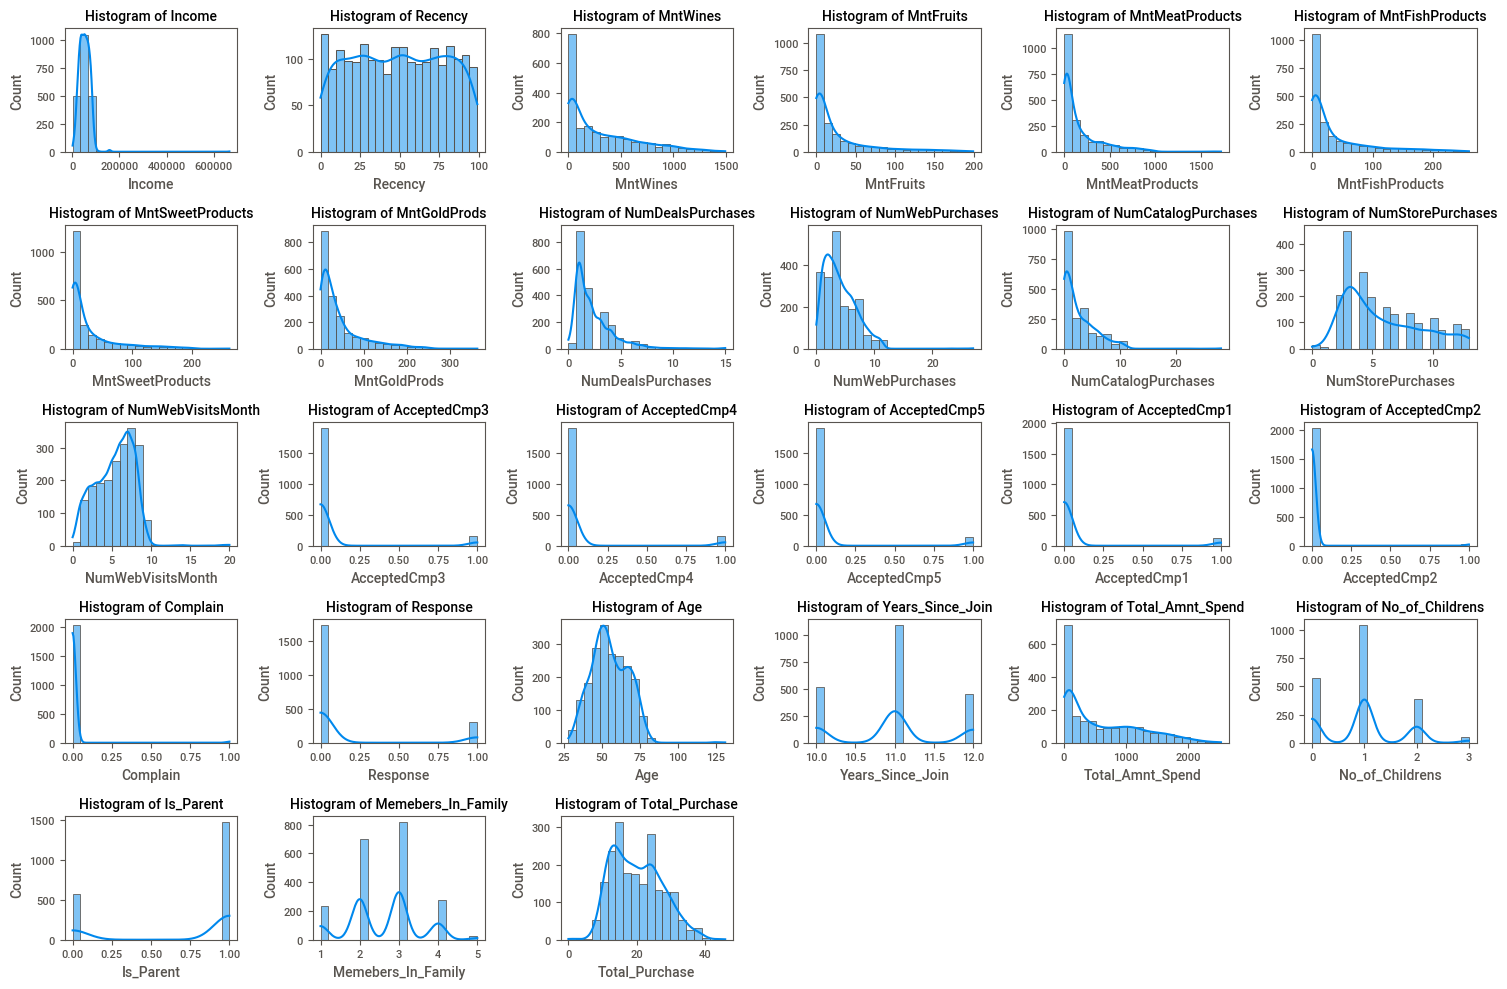

In [40]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_cols):
    plt.subplot(5, 6, i + 1)
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f"Histogram of {column}", fontsize=10)
    plt.tight_layout()
plt.show()


### Boxplot for each Feature.

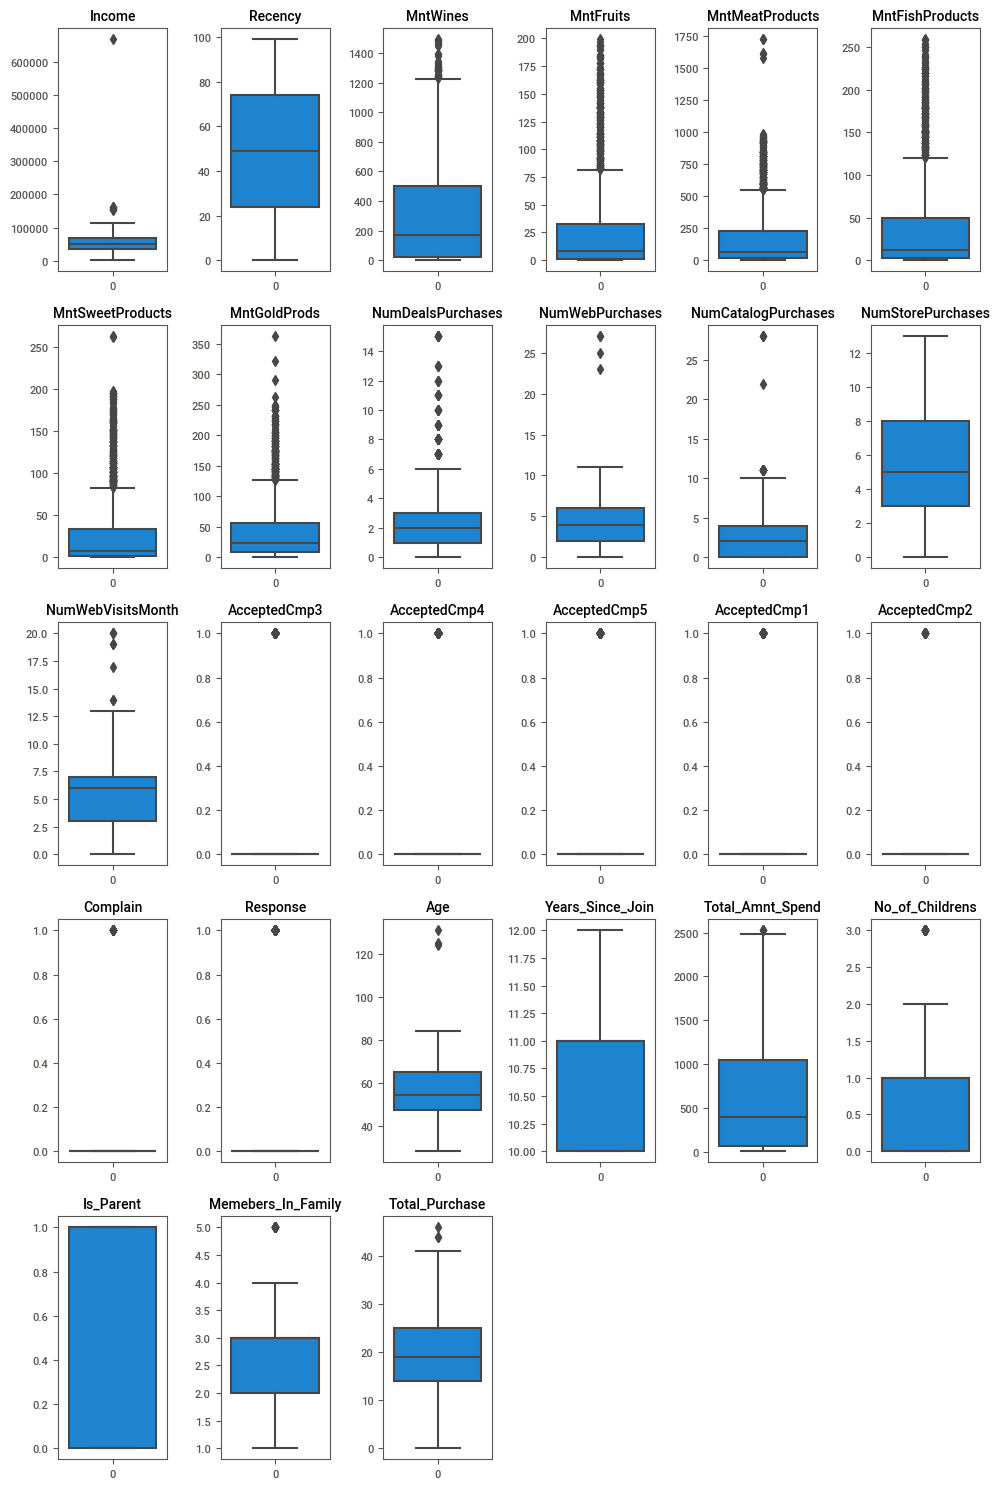

In [41]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 15))
for i, column in enumerate(numeric_cols):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(df[column])
    plt.title(f"{column}", fontsize=10)
    plt.tight_layout()
plt.show()


<Axes: ylabel='Complain'>

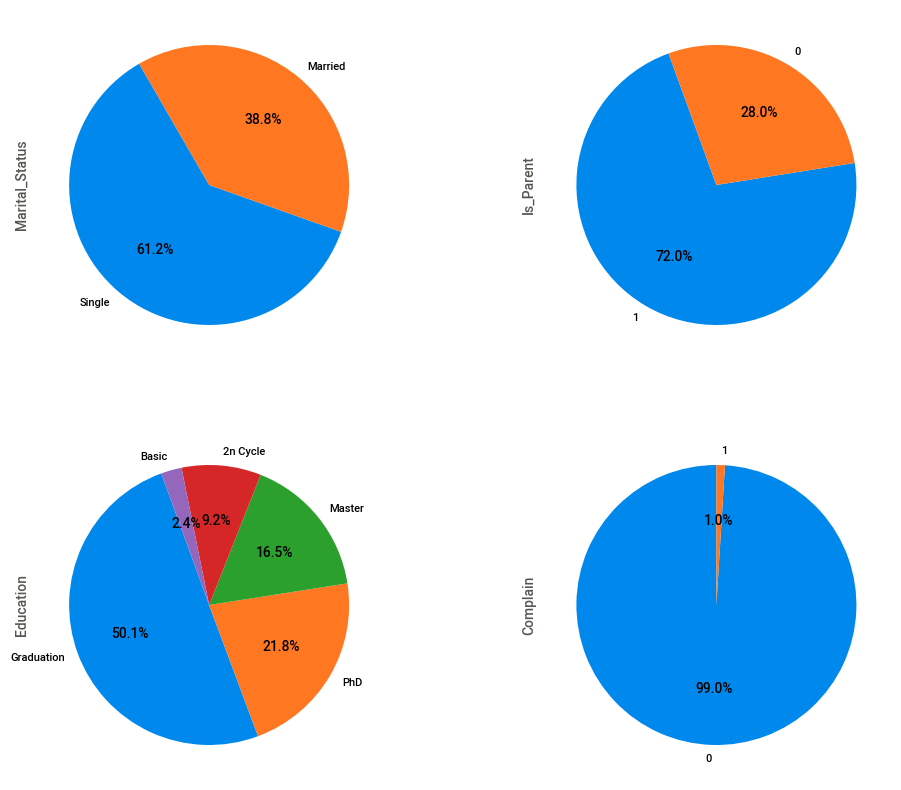

In [42]:
plt.figure(figsize= (12,10))
plt.subplot(2,2,1)
df["Marital_Status"].value_counts().plot.pie(autopct="%1.1f%%",startangle=120)
plt.subplot(2,2,2)
df["Is_Parent"].value_counts().plot.pie(autopct="%1.1f%%",startangle=110)
plt.subplot(2,2,3)
df["Education"].value_counts().plot.pie(autopct="%1.1f%%",startangle=110)
plt.subplot(2,2,4)
df["Complain"].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)

### Hence almost 99.1% are not raised the complaints so removed these feature to avoid the bias.

In [43]:
df.drop("Complain",axis=1,inplace=True)

### 

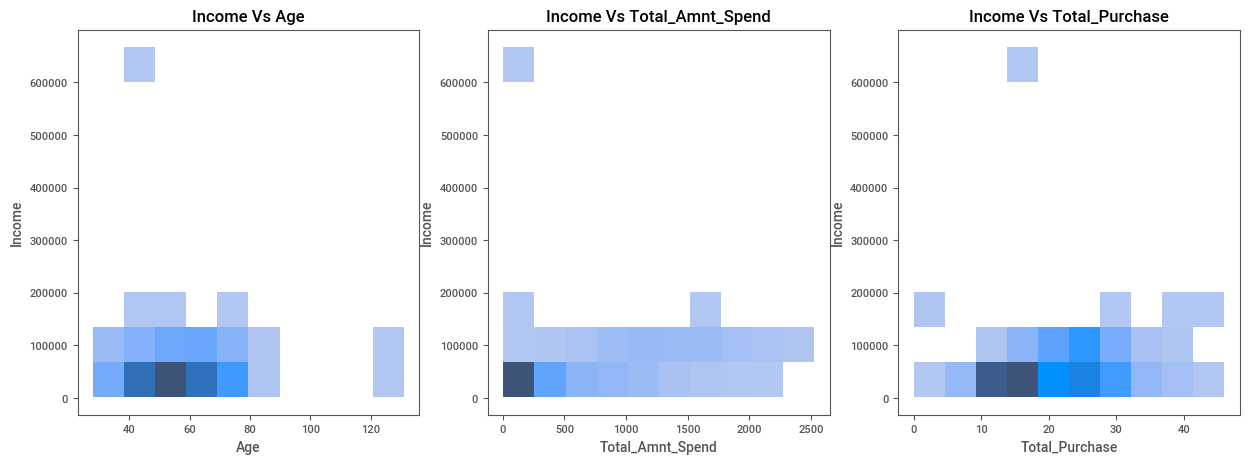

In [44]:
columns=["Age","Total_Amnt_Spend","Total_Purchase"]
plt.figure(figsize=(15,5))
for i,column in enumerate(columns):
    plt.subplot(1,3,i+1)
    sns.histplot(x=column,y="Income",data=df,bins=10)
    plt.title(f"Income Vs {column}")
plt.show()

### Converting Categorical to Numerical data

### Label Encoding the Education feature.

In [45]:
df["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [46]:
Education={
    "2n Cycle":0,
    "Basic":1,
    "Graduation":2,
    "Master":3,
    "PhD":4
}

In [47]:
data=df.copy()

In [48]:
data["Education"] = data["Education"].apply(lambda x: Education[x])

In [49]:
data.Education.unique()

array([2, 4, 3, 1, 0], dtype=int64)

### One Hot Encoding Maritial Status

In [50]:
Marital_Status = {
    "Single":0,
    "Married":1
}
data["Marital_Status"] = data["Marital_Status"].apply(lambda x : Marital_Status[x])

## Standardizing the dataset.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df,columns=data.columns)

In [53]:
scaled_df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Response,Age,Years_Since_Join,Total_Amnt_Spend,No_of_Childrens,Is_Parent,Memebers_In_Family,Total_Purchase
0,0.5,0.0,0.084832,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,...,0.0,0.0,1.0,0.378641,1.0,0.639683,0.000000,0.0,0.00,0.695652
1,0.5,0.0,0.067095,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,...,0.0,0.0,0.0,0.407767,0.0,0.008730,0.666667,1.0,0.50,0.239130
2,0.5,0.0,0.105097,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,...,0.0,0.0,0.0,0.300971,0.5,0.305952,0.000000,0.0,0.25,0.543478
3,0.5,0.0,0.037471,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,...,0.0,0.0,0.0,0.116505,0.0,0.019048,0.333333,1.0,0.50,0.304348
4,1.0,1.0,0.085065,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,...,0.0,0.0,0.0,0.145631,0.0,0.165476,0.333333,1.0,0.50,0.521739


### TSNE Plot To Visualize the dataset.

In [54]:
from sklearn.manifold import TSNE
from bioinfokit.visuz import cluster

In [82]:
data_tsne = TSNE(n_components=2,perplexity=100).fit_transform(scaled_df)

In [56]:
color_class = df["Is_Parent"].to_numpy()
cluster.tsneplot(score=data_tsne,colorlist=color_class,legendpos="best")

<center><img src="tsne_2d.png" alt="Description" width="600px" height="600px"></center>


## Clustering

## Hierarchial CLustering

In [57]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [58]:
dm = sch.linkage(scaled_df,metric="euclidean",method="complete")

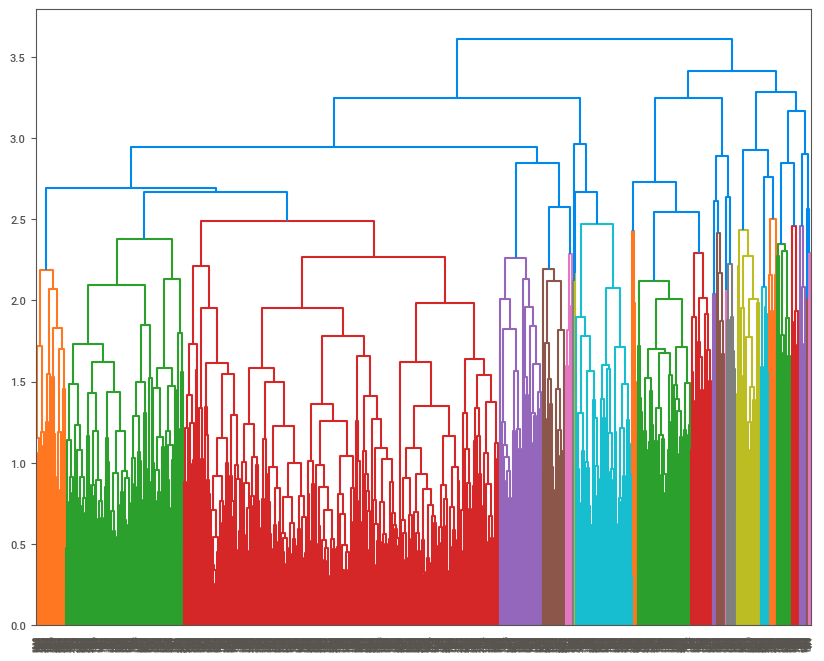

In [59]:
plt.figure(figsize=(10, 8)) 
dendrogram = sch.dendrogram(dm)

In [60]:
# Perfoming Hyperparameter tuning to obtain the best params to Hierarchial Clustering.

from sklearn.metrics import silhouette_score

metrics=["euclidean","manhattan","cosine"]
methods = ["single","complete","average"]
thresholds = [2,3,4,5]

best_score = -1
best_params={}

for threshold in thresholds:
    for metric in metrics:
        for method in methods:
            clusters = AgglomerativeClustering(n_clusters=threshold,metric=metric,linkage=method)
            clusters.fit(scaled_df)
            score = silhouette_score(scaled_df,clusters.labels_)
            if score > best_score:
                best_score = score
                best_params={
                    "Metrics":metric,
                    "Method":method,
                    "n_clusters":threshold
                }
            else:
                continue
print(f"best_score:{best_score}")
print(f"best_params:{best_params}")

best_score:0.34521720038465514
best_params:{'Metrics': 'euclidean', 'Method': 'average', 'n_clusters': 2}


### KMeans Clustering

In [61]:
# Using Elbow Curve to Determine number of clusters to be taken.

from sklearn.cluster import KMeans
inertia=[]
best_score=-1
n_clusters=0
thresholds = [2,3,4,5,6,7]

for threshold in thresholds:
    cluster = KMeans(n_clusters=threshold)
    cluster.fit(scaled_df)
    inertia.append(cluster.inertia_)
    score = silhouette_score(scaled_df,cluster.labels_)
    if score > best_score:
        best_score = score
        n_clusters=threshold
    else:
        continue
print(inertia)
print(f"best_score:{best_score}")
print(f"n_clusters:{n_clusters}")

[2673.8396785832347, 2313.08181515013, 2136.7422214370754, 2017.0404534518789, 1939.583573919288, 1851.3153596232976]
best_score:0.2677259200599951
n_clusters:2


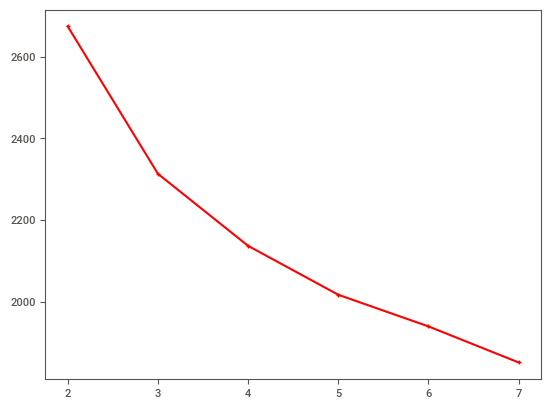

In [62]:
plt.plot(thresholds,inertia,color="red",marker="+")

### DBSCAN Clustering

In [63]:
# Performing Hyperparameter tuning to obtain the best params for Dbscan.
from sklearn.cluster import DBSCAN
eps_values = [0.1, 0.2, 0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]
metrics = ['euclidean', 'manhattan', 'cosine']
best_score = -1
best_params = {}

for eps_value in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            dbscan = DBSCAN(eps=eps_value,min_samples=min_samples,metric = metric,)
            labels = dbscan.fit_predict(scaled_df)
            if len(pd.Series(labels).unique())>1:
                score = silhouette_score(scaled_df,labels)
                if score > best_score:
                    best_score = score
                    best_params ={
                    "eps":eps_value,
                    "min_samples":min_samples,
                    "metric":metric
                    }
                else:
                    continue
            else:
                continue
print(f"best_score:{best_score}")
print(f"best_params:{best_params}")

best_score:0.22579369145037007
best_params:{'eps': 0.3, 'min_samples': 3, 'metric': 'cosine'}


#### Hence the scores very low so drop the following features and Form the clusters.

In [64]:
sample = scaled_df.drop(["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Response"],axis=1)

### Performing Dimensionality Reduction for the above dataset.

In [65]:
from sklearn.decomposition import PCA
pca =PCA(n_components=2)
pca_components = pca.fit_transform(sample)

In [66]:
column=[f"col{i}" for i in range(1,3)]
final_df = pd.DataFrame(pca_components,columns=column)

### Hierarchial Clustering with the final_df

In [67]:
from sklearn.metrics import silhouette_score

metrics=["euclidean","manhattan","cosine"]
methods = ["single","complete","average"]
thresholds = [2,3,4,5] 

best_score = -1
best_params={}

for threshold in thresholds:
    for metric in metrics:
        for method in methods:
            clusters = AgglomerativeClustering(n_clusters=threshold,metric=metric,linkage=method)
            clusters.fit(final_df)
            score = silhouette_score(final_df,clusters.labels_)
            if score > best_score:
                best_score = score
                best_params={
                    "Metrics":metric,
                    "Method":method,
                    "n_clusters":threshold
                }
            else:
                continue
print(f"best_score:{best_score}")
print(f"best_params:{best_params}")

best_score:0.639070802335278
best_params:{'Metrics': 'manhattan', 'Method': 'average', 'n_clusters': 5}


### KMeans Clustering with the final_df

In [68]:
# Using Elbow Curve to Determine number of clusters to be taken.
from sklearn.cluster import KMeans
inertia=[]
best_score=-1
n_clusters=0
thresholds = [2,3,4,5,6,7]

for threshold in thresholds:
    cluster = KMeans(n_clusters=threshold)
    cluster.fit(final_df)
    inertia.append(cluster.inertia_)
    score = silhouette_score(final_df,cluster.labels_)
    if score > best_score:
        best_score = score
        n_clusters=threshold
    else:
        continue
print(f"best_score:{best_score}")
print(f"n_clusters:{n_clusters}")

best_score:0.6598922899029818
n_clusters:4


### DBSCAN Clustering with final_df

In [69]:
eps_values = [0.1, 0.2, 0.3, 0.5, 0.7]
min_samples_values = [3, 5, 10]
metrics = ['euclidean', 'manhattan', 'cosine']
best_score = -1
best_params = {}
n_clustors=0
data_labels=None

for eps_value in eps_values:
    for min_samples in min_samples_values:
        for metric in metrics:
            dbscan = DBSCAN(eps=eps_value,min_samples=min_samples,metric = metric,)
            labels = dbscan.fit_predict(final_df)
            if len(pd.Series(labels).unique())>1:
                score = silhouette_score(final_df,labels)
                if score > best_score:        
                    best_score = score
                    best_params ={
                    "eps":eps_value,
                    "min_samples":min_samples,
                    "metric":metric
                    }
                    n_clustors=len(pd.Series(labels).unique())
                    data_labels=pd.Series(labels).unique()
                else:
                    continue
            else:
                continue
print(f"best_score:{best_score}")
print(f"best_params:{best_params}")
print(f"n_clustors:{n_clustors}")
print(f"labels:{data_labels}")

best_score:0.47612480601893004
best_params:{'eps': 0.1, 'min_samples': 3, 'metric': 'cosine'}
n_clustors:2
labels:[0 1]


## Clustering Algorithm Selection

By Comparing the Silhouette Scores of all the three clustering methods, the KMeans Clustering algorithm is giving the highest score hence the KMeans Clustering Algorithm (0.659) is Selected.

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(final_df)
labels = kmeans.labels_

In [71]:
labeled_data = data.copy()

In [72]:
labeled_data["labels"] = labels

In [73]:
labeled_data.labels.value_counts()

1    855
2    573
0    401
3    222
Name: labels, dtype: int64

In [ ]:
# labeled_data.to_csv("final_data.csv")

In [79]:
labeled_data = pd.read_csv("final_data.csv")
labeled_data.drop("Unnamed: 0",axis=1,inplace=True)

In [86]:
pd.set_option('display.max_columns', None)
x= labeled_data.groupby("labels").mean()
print(x)

        Education  Marital_Status        Income    Recency    MntWines  \
labels                                                                   
0        2.439153             1.0  46073.043649  48.802469  215.081129   
1        2.336658             0.0  67186.653781  49.618454  528.421446   
2        2.402339             0.0  45826.165252  49.616374  202.430409   
3        2.350877             1.0  66371.656980  46.271930  511.561404   

        MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
labels                                                                  
0       14.626102        83.723104        18.511464         15.169312   
1       55.770574       386.837905        82.084788         57.284289   
2       12.760234        70.018713        17.766082         13.506433   
3       53.671053       359.092105        77.982456         55.798246   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
labels                             

# Analysis

### **Sweet & Short Analysis on Targeted Products**

1. **Group 0 (Moderate Buyers):**  
   - Spend **less** on wines and other products, with minimal purchases of luxury items.  
   - Focus on **basic needs** and family-oriented offers.

2. **Group 1 (Top Spenders):**  
   - Spend **high** on wines, meat, fruits, and gold products.  
   - Likely prefer **premium and luxury items**.  

3. **Group 2 (Moderate to Low Buyers):**  
   - Similar to Group 0, but slightly higher on meat and wine.  
   - Prioritize **value-for-money deals**.

4. **Group 3 (Luxury Shoppers):**  
   - Heavy spenders on **high-end wines, fruits, and gold items**.  
   - Interested in **exclusive deals and premium bundles**.

### **Insights:**  
- Wines and meat are the **key products** for all groups.  
- Luxury items like gold are best targeted toward Groups 1 & 3.  
- Affordable bundles will appeal to Groups 0 & 2.

# Model Building

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("final_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2051 non-null   int64  
 1   Education            2051 non-null   int64  
 2   Marital_Status       2051 non-null   int64  
 3   Income               2051 non-null   float64
 4   Recency              2051 non-null   int64  
 5   MntWines             2051 non-null   int64  
 6   MntFruits            2051 non-null   int64  
 7   MntMeatProducts      2051 non-null   int64  
 8   MntFishProducts      2051 non-null   int64  
 9   MntSweetProducts     2051 non-null   int64  
 10  MntGoldProds         2051 non-null   int64  
 11  NumDealsPurchases    2051 non-null   int64  
 12  NumWebPurchases      2051 non-null   int64  
 13  NumCatalogPurchases  2051 non-null   int64  
 14  NumStorePurchases    2051 non-null   int64  
 15  NumWebVisitsMonth    2051 non-null   i

In [5]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [6]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp2,Response,Age,Years_Since_Join,Total_Amnt_Spend,No_of_Childrens,Is_Parent,Memebers_In_Family,Total_Purchase,labels
0,2,0,58138.0,58,635,88,546,172,88,88,...,0,1,67,12,1617,0,0,1,32,1
1,2,0,46344.0,38,11,1,6,2,1,6,...,0,0,70,10,27,2,1,3,11,2
2,2,0,71613.0,26,426,49,127,111,21,42,...,0,0,59,11,776,0,0,2,25,1
3,2,0,26646.0,26,11,4,20,10,3,5,...,0,0,40,10,53,1,1,3,14,2
4,4,1,58293.0,94,173,43,118,46,27,15,...,0,0,43,10,422,1,1,3,24,0


In [7]:
X = df.drop("labels",axis = 1)
Y = df.labels

In [8]:
# Standardize X ( Independent Features)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(X)
x = pd.DataFrame(x,columns=X.columns)

In [9]:
scaled_df = pd.concat([x,Y],axis=1)

## Feature Selection

### PPSCORE

In [10]:
import ppscore
matrix = ppscore.matrix(scaled_df)

In [12]:
scores = matrix[matrix["y"]=="labels"]

In [13]:
scores

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
28,Education,labels,0.000000,regression,True,mean absolute error,0.859581,0.894859,DecisionTreeRegressor()
57,Marital_Status,labels,0.135612,regression,True,mean absolute error,0.859581,0.743011,DecisionTreeRegressor()
86,Income,labels,0.000000,regression,True,mean absolute error,0.859581,1.049398,DecisionTreeRegressor()
115,Recency,labels,0.000000,regression,True,mean absolute error,0.859581,0.903570,DecisionTreeRegressor()
144,MntWines,labels,0.000000,regression,True,mean absolute error,0.859581,1.046223,DecisionTreeRegressor()
173,MntFruits,labels,0.000000,regression,True,mean absolute error,0.859581,0.931647,DecisionTreeRegressor()
202,MntMeatProducts,labels,0.000000,regression,True,mean absolute error,0.859581,0.968263,DecisionTreeRegressor()
231,MntFishProducts,labels,0.000000,regression,True,mean absolute error,0.859581,0.927609,DecisionTreeRegressor()
260,MntSweetProducts,labels,0.000000,regression,True,mean absolute error,0.859581,0.930697,DecisionTreeRegressor()
289,MntGoldProds,labels,0.000000,regression,True,mean absolute error,0.859581,0.919350,DecisionTreeRegressor()


### SelectKBest Method

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [15]:
scores = SelectKBest(score_func=chi2,k=20)

In [16]:
scores.fit(x,Y)

SelectKBest(k=20, score_func=<function chi2 at 0x000001B9730DAFC0>)

In [17]:
scores.get_feature_names_out()

array(['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Total_Amnt_Spend',
       'No_of_Childrens', 'Is_Parent', 'Memebers_In_Family'], dtype=object)

In [18]:
scores.scores_

array([3.08899987e-01, 1.25600000e+03, 5.69856768e+00, 4.52581659e-01,
       9.54420915e+01, 1.44259811e+02, 1.37309443e+02, 1.77079891e+02,
       1.10575764e+02, 3.05452566e+01, 2.89790514e+01, 3.51770499e+00,
       5.96368490e+01, 3.86662011e+01, 2.54187745e+01, 5.73999086e-01,
       1.39447798e+01, 2.32994459e+02, 1.78218947e+02, 2.02445295e+01,
       9.24237708e+01, 3.59915525e-01, 1.02794396e+00, 1.82850794e+02,
       2.36519232e+02, 5.01409348e+02, 1.43332409e+02, 3.48951134e+00])

### Recursive Feature Elimination (RFE) Method

In [19]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [20]:
estimator=LogisticRegression()
rfe = RFE(estimator)
rfe.fit(x,Y)

RFE(estimator=LogisticRegression())

In [21]:
rfe.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False])

In [22]:
rfe.n_features_

14

In [23]:
rfe.ranking_

array([ 8,  1, 15,  9,  1,  1,  1,  1,  1,  1,  1, 14,  6,  1,  4, 13,  3,
       12,  2,  7,  5, 11,  1,  1,  1,  1,  1, 10])

In [26]:
scores={
    "features":x.columns,
    "score":rfe.ranking_
}

In [27]:
scores = pd.DataFrame(scores)

In [28]:
features=scores[scores["score"]==1].features.values

In [33]:
x = df[features]

In [34]:
x.columns

Index(['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'Years_Since_Join',
       'Total_Amnt_Spend', 'No_of_Childrens', 'Is_Parent',
       'Memebers_In_Family'],
      dtype='object')

In [38]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x = pd.DataFrame(scaled,columns=x.columns)

In [39]:
x.head()

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumStorePurchases,Years_Since_Join,Total_Amnt_Spend,No_of_Childrens,Is_Parent,Memebers_In_Family
0,0.0,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.307692,1.0,0.639683,0.000000,0.0,0.00
1,0.0,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.153846,0.0,0.008730,0.666667,1.0,0.50
2,0.0,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.769231,0.5,0.305952,0.000000,0.0,0.25
3,0.0,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.307692,0.0,0.019048,0.333333,1.0,0.50
4,1.0,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.461538,0.0,0.165476,0.333333,1.0,0.50


In [67]:
# Splitting the data into Test and Train

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size=0.2,random_state=7)

In [71]:
x_train.shape

(1640, 14)

In [72]:
y_train.shape

(1640,)

In [77]:
print(x_test.shape)
print(y_test.shape)

(411, 14)
(411,)


In [86]:
def Evaluate(model):
    model = model
    train_prediction = model.predict(x_train)
    test_prediction = model.predict(x_test)
    
    classification = classification_report(y_train,train_prediction)
    print(f"Classification_Report for train Data:\n{classification}\n")
    classification = classification_report(y_test,test_prediction)
    print(f"Classification_Report  for test Data:\n{classification}\n")
    
    accuracy_train = accuracy_score(y_train,train_prediction)
    print(f"Training Data Accuracy :{np.round(accuracy_train,4)*100} %")
    accuracy_test = accuracy_score(y_test,test_prediction)
    print(f"Testing Data Accuracy :{np.round(accuracy_test,4)*100} %\n")

    matrix_train = confusion_matrix(y_train,train_prediction)
    print(f"Confusion Matrix of Training Data:\n {matrix_train}\n")
    matrix_test = confusion_matrix(y_test,test_prediction)
    print(f"Confusion Matrix of Testing Data:\n {matrix_test}\n\n")

    try:
        tpr,fpr,threshold = roc_curve(y_test,model.predict_proba(x_test)[:,1])
        plt.plot(tpr,fpr,color="red",label=f"model")
        plt.plot([0,1],[0,1],color="blue",linestyle="--")
        plt.title(f"ROC Curve")
        plt.show()
    except:
        pass

    accuracy = accuracy_score(y_test,test_prediction)
    report = classification_report(y_test, test_prediction, output_dict=True)
    precision = report["weighted avg"]["precision"]
    recall = report["weighted avg"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]

    report={
        "accuracy":accuracy,
        "precision":precision,
        "recall":recall,
        "f1_score":f1_score
    }

    return [np.round(accuracy_train,4)*100,np.round(accuracy_test,4)*100,report,matrix_train,matrix_test]

In [79]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

## LogisticRegession Model

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [103]:
kfold = KFold(n_splits=5,random_state=3,shuffle=True)
logistic_model = LogisticRegression()
logistic_cross_val_score = cross_val_score(logistic_model,x_train,y_train,cv=kfold)

In [104]:
print(logistic_cross_val_score)

[0.97865854 0.97256098 0.98170732 0.9847561  0.97865854]


In [84]:
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [87]:
logistic_model_data = Evaluate(logistic_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       458
           1       0.99      0.96      0.98       314
           2       0.98      1.00      0.99       690
           3       1.00      0.94      0.97       178

    accuracy                           0.99      1640
   macro avg       0.99      0.98      0.98      1640
weighted avg       0.99      0.99      0.99      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       0.99      0.98      0.98        87
           2       0.99      0.99      0.99       165
           3       1.00      0.96      0.98        50

    accuracy                           0.99       411
   macro avg       0.99      0.98      0.99       411
weighted avg       0.99      0.99      0.99       411


Training Data Accuracy :98.6 %
Testing Data Accuracy

### Decision Tree Model

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
estimator = DecisionTreeClassifier()
decisiontree_cross_val_score =cross_val_score(estimator,x_train,y_train,cv=kfold)

In [102]:
print(decisiontree_cross_val_score)

[0.99390244 0.96646341 0.98170732 0.97865854 0.96036585]


In [91]:
parameters={
    "criterion":["gini","entropy"],
    "min_samples_split":[2,3,4,5,6,7],
    "max_depth":[2,3,4,5,6]
                 }
grid_search = GridSearchCV(estimator=estimator,param_grid = parameters,cv=kfold)

In [92]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [93]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

In [119]:
DecisionTree_model = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2)

In [120]:
DecisionTree_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [121]:
decisiontree_model_data = Evaluate(DecisionTree_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       458
           1       0.99      0.99      0.99       314
           2       1.00      0.99      0.99       690
           3       1.00      0.98      0.99       178

    accuracy                           0.99      1640
   macro avg       0.99      0.99      0.99      1640
weighted avg       0.99      0.99      0.99      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.98      0.98      0.98        87
           2       0.99      0.99      0.99       165
           3       0.98      0.96      0.97        50

    accuracy                           0.98       411
   macro avg       0.98      0.98      0.98       411
weighted avg       0.98      0.98      0.98       411


Training Data Accuracy :99.33 %
Testing Data Accurac

## Bagging Model

In [98]:
from sklearn.ensemble import BaggingClassifier

In [105]:
estimator = DecisionTreeClassifier(criterion="gini",min_samples_split=2,max_depth=3)
model = BaggingClassifier(estimator=estimator)
bagging_cross_val_score = cross_val_score(model,x_train,y_train,cv=kfold)

In [106]:
print(bagging_cross_val_score)

[0.97865854 0.97256098 0.98780488 0.97560976 0.9695122 ]


In [107]:
parameters={
    
    "n_estimators":[1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,150]
}
grid_search = GridSearchCV(estimator=model,param_grid=parameters,cv=kfold)

In [108]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=3)),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                          40, 50, 100, 150]})

In [109]:
grid_search.best_params_

{'n_estimators': 5}

In [122]:
bagging_model = BaggingClassifier(estimator=estimator,n_estimators=5)
bagging_model.fit(x_train,y_train)

BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=5)

In [123]:
bagging_model_data = Evaluate(bagging_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       458
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       690
           3       1.00      0.97      0.99       178

    accuracy                           1.00      1640
   macro avg       1.00      0.99      1.00      1640
weighted avg       1.00      1.00      1.00      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       0.98      0.95      0.97        87
           2       0.98      0.99      0.98       165
           3       1.00      0.96      0.98        50

    accuracy                           0.98       411
   macro avg       0.98      0.98      0.98       411
weighted avg       0.98      0.98      0.98       411


Training Data Accuracy :99.7 %
Testing Data Accuracy

## Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
estimator = RandomForestClassifier()
random_forest_cross_val_score =cross_val_score(estimator,x_train,y_train,cv=kfold)

In [116]:
print(random_forest_cross_val_score)

[0.9847561  0.97560976 0.99085366 0.9847561  0.97865854]


In [117]:
parameters={
    "n_estimators":[1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,200,300],
    "criterion":["entropy","gini"],
    "min_samples_split":[1,2,3,4,5],
    "max_depth":[1,2,3,4,5]
}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,cv=kfold) 

In [118]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30,
                                          40, 50, 100, 200, 300]})

In [124]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 30}

In [125]:
RandomForest_model = RandomForestClassifier(criterion="gini",
                                            max_depth=5,
                                            min_samples_split=2,
                                            n_estimators=30)

In [126]:
RandomForest_model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=30)

In [146]:
randomforest_model_data = Evaluate(RandomForest_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       458
           1       1.00      0.97      0.99       314
           2       0.99      1.00      0.99       690
           3       1.00      0.96      0.98       178

    accuracy                           0.99      1640
   macro avg       0.99      0.98      0.99      1640
weighted avg       0.99      0.99      0.99      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       0.99      0.95      0.97        87
           2       0.98      0.99      0.98       165
           3       1.00      0.98      0.99        50

    accuracy                           0.99       411
   macro avg       0.99      0.98      0.99       411
weighted avg       0.99      0.99      0.99       411


Training Data Accuracy :98.96000000000001 %
Testing 

## AdaBoost Model

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
estimator = AdaBoostClassifier()
adaboost_cross_val_score = cross_val_score(estimator,x_train,y_train,cv=kfold)
print(adaboost_cross_val_score)

[0.70121951 0.65853659 0.73170732 0.72560976 0.68292683]


In [131]:
parameters = {
    "n_estimators":[1,2,3,4,5,6,7,10,15,20,25,30,50,100],
    "learning_rate":[1e-1,1e-2,1e-3,1e-4]
}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,cv=kfold)
    

In [132]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 10, 15, 20, 25,
                                          30, 50, 100]})

In [133]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 1}

In [139]:
AdaBoost_model = AdaBoostClassifier(learning_rate=0.1,
                                    n_estimators = 1 )
AdaBoost_model.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1)

In [145]:
AdaBoost_model_data = Evaluate(AdaBoost_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       458
           1       0.00      0.00      0.00       314
           2       0.69      1.00      0.81       690
           3       0.00      0.00      0.00       178

    accuracy                           0.70      1640
   macro avg       0.35      0.50      0.41      1640
weighted avg       0.49      0.70      0.58      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.69      1.00      0.81       109
           1       0.00      0.00      0.00        87
           2       0.65      1.00      0.79       165
           3       0.00      0.00      0.00        50

    accuracy                           0.67       411
   macro avg       0.34      0.50      0.40       411
weighted avg       0.44      0.67      0.53       411


Training Data Accuracy :70.0 %
Testing Data Accuracy

## GradientBoost Model

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
estimator = GradientBoostingClassifier()
parameters ={
    'loss': ['log_loss'],
    'learning_rate': [0.01,0.001,0.0001], 
    'n_estimators': [10,20,50,100, 200], 
    'min_samples_split': [2,3,4],  
    'max_depth': [3, 5, 7]
} 

grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,cv=kfold,scoring="accuracy",n_jobs=-1)

In [148]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001, 0.0001],
                         'loss': ['log_loss'], 'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [10, 20, 50, 100, 200]},
             scoring='accuracy')

In [149]:
grid_search.best_params_

{'learning_rate': 0.01,
 'loss': 'log_loss',
 'max_depth': 5,
 'min_samples_split': 4,
 'n_estimators': 200}

In [150]:
GradientBoost_model = GradientBoostingClassifier(criterion="friedman_mse",
 learning_rate = 0.01,
 loss ="log_loss",
 max_depth= 5,
 min_samples_split= 4,
 n_estimators=200)

In [151]:
GradientBoost_model.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=4,
                           n_estimators=200)

In [153]:
gradient_cross_val_score = cross_val_score(estimator,x_train,y_train,cv=kfold)

In [154]:
print(gradient_cross_val_score)

[0.98170732 0.96646341 0.99695122 0.98780488 0.97560976]


In [155]:
gradientboost_model_data = Evaluate(GradientBoost_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       178

    accuracy                           1.00      1640
   macro avg       1.00      1.00      1.00      1640
weighted avg       1.00      1.00      1.00      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.99      0.95      0.97        87
           2       0.98      0.99      0.98       165
           3       0.98      0.96      0.97        50

    accuracy                           0.98       411
   macro avg       0.98      0.97      0.98       411
weighted avg       0.98      0.98      0.98       411


Training Data Accuracy :100.0 %
Testing Data Accurac

## XGBClassifier Model

In [157]:
from xgboost import XGBClassifier


In [158]:
estimator = XGBClassifier()
parameters = {
    "n_estimators":[2,4,6,10,15,20,50,100,150,200],
    "learning_rate":[1e-1,1e-2,1e-3,1e-4],
    "max_depth":[1,2,3,4,5,6,7],
    "min_samples_split":[1,2,3,4,5,6,7],
    "objective":["binary:logistic"]
}
    

In [160]:
grid_search = GridSearchCV(estimator = estimator,param_grid=parameters,scoring="accuracy",cv=kfold,n_jobs=-1,verbose=1)

In [161]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1960 candidates, totalling 9800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [2, 4, 6, 10, 15, 20, 50, 100, 150,
                                          200],
                         'objective': ['binary:logistic']},
             scoring='accuracy', verbose=1)

In [163]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 1,
 'n_estimators': 50,
 'objective': 'binary:logistic'}

In [164]:
XGBoost_model = XGBClassifier(n_estimators=50,
                             learning_rate=0.1,
                             max_depth = 5,
                             min_samples_split = 1,
                             objective = "binary:logistic")

In [167]:
XGBoost_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, min_samples_split=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [165]:
xgboost_cross_val_score = cross_val_score(XGBoost_model,x_train,y_train,cv=kfold)
print(xgboost_cross_val_score)

[0.9847561  0.97256098 0.99390244 0.99085366 0.98170732]


In [168]:
XGBoost_model_data = Evaluate(XGBoost_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       178

    accuracy                           1.00      1640
   macro avg       1.00      1.00      1.00      1640
weighted avg       1.00      1.00      1.00      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.98      0.97      0.97        87
           2       0.98      0.99      0.98       165
           3       0.98      0.96      0.97        50

    accuracy                           0.98       411
   macro avg       0.98      0.98      0.98       411
weighted avg       0.98      0.98      0.98       411


Training Data Accuracy :100.0 %
Testing Data Accurac

## LGBM Model

In [173]:
from lightgbm  import LGBMClassifier

In [ ]:
estimator = LGBMClassifier()
parameters={
    "n_estimators":[5,10,15,20,50,100,200],
    "min_samples_split":[2,3,4,5,6],
    "max_depth":[3,4,5,7,-1],
    "learning_rate":[1e-1,1e-2,1e-3,1e-4],
    "objective":["binary"]
}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring="accuracy",cv=kfold,verbose=1,n_jobs=-1)

In [174]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 1960 candidates, totalling 9800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=3, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     inte...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7],
                         'n_estimators': [2, 4, 6, 10, 15, 20, 50, 100, 150,
                                          200],
                         'objective': ['binary:logistic']},
             scoring='accuracy', verbose=1)

In [177]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 1,
 'n_estimators': 50,
 'objective': 'binary:logistic'}

In [184]:
LGBM_model = LGBMClassifier(
    learning_rate= 0.1,
    max_depth = 5,
    n_estimators = 50,
    objective = "multiclass"
)

In [ ]:
LGBM_model.fit(x_train,y_train)

In [187]:
LGBM_model

LGBMClassifier(max_depth=5, n_estimators=50, objective='multiclass')

In [ ]:
lgbm_cross_val_score = cross_val_score(LGBM_model,x_train,y_train,cv=kfold)

In [190]:
print(lgbm_cross_val_score)

[0.98170732 0.9695122  0.9847561  0.98780488 0.98170732]


In [191]:
LGBM_model_data = Evaluate(LGBM_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       178

    accuracy                           1.00      1640
   macro avg       1.00      1.00      1.00      1640
weighted avg       1.00      1.00      1.00      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.99      0.98      0.98        87
           2       0.99      0.99      0.99       165
           3       0.98      0.96      0.97        50

    accuracy                           0.99       411
   macro avg       0.98      0.98      0.98       411
weighted avg       0.99      0.99      0.99       411


Training Data Accuracy :100.0 %
Testing Data Accurac

## KNN Model

In [194]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [196]:
estimator = KNN()
params={
    "n_neighbors":[3,5,7,9]
}
grid_search = GridSearchCV(estimator = estimator,param_grid=params,verbose=1)

In [197]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]}, verbose=1)

In [198]:
grid_search.best_params_

{'n_neighbors': 5}

In [199]:
knn_model = KNN(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [200]:
knn_cross_val_score = cross_val_score(knn_model,x_train,y_train,cv=kfold)
print(knn_cross_val_score)

[0.97560976 0.97256098 0.98170732 0.98780488 0.97560976]


In [201]:
knn_model_data = Evaluate(knn_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       458
           1       0.99      0.96      0.97       314
           2       0.98      1.00      0.99       690
           3       0.99      0.93      0.96       178

    accuracy                           0.98      1640
   macro avg       0.99      0.97      0.98      1640
weighted avg       0.98      0.98      0.98      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       0.98      0.97      0.97        87
           2       0.98      0.99      0.98       165
           3       1.00      0.96      0.98        50

    accuracy                           0.98       411
   macro avg       0.99      0.98      0.98       411
weighted avg       0.98      0.98      0.98       411


Training Data Accuracy :98.22999999999999 %
Testing 

## SVM Model

In [202]:
from sklearn.svm import SVC

In [203]:
estimator = SVC()
parameters = {
    "kernel":["linear","poly","rbf"],
    "gamma":["scale","auto",0.1,0.001],
    "C":[0.1,0.001,1,10,100]
}
grid_search = GridSearchCV(estimator,param_grid=parameters,verbose=1)

In [204]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.001, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [205]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}

In [207]:
SVM_model = SVC(C=10,gamma="scale",kernel="poly")
SVM_model.fit(x_train,y_train)

SVC(C=10, kernel='poly')

In [208]:
svm_model_data = Evaluate(SVM_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       458
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       690
           3       1.00      1.00      1.00       178

    accuracy                           1.00      1640
   macro avg       1.00      1.00      1.00      1640
weighted avg       1.00      1.00      1.00      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.98      1.00      0.99        87
           2       1.00      0.99      0.99       165
           3       0.96      0.98      0.97        50

    accuracy                           0.99       411
   macro avg       0.98      0.99      0.98       411
weighted avg       0.99      0.99      0.99       411


Training Data Accuracy :99.94 %
Testing Data Accurac

## Stacked Model

In [210]:
from sklearn.ensemble import VotingClassifier

In [211]:

Estimators=[
    ("logistic Regression",logistic_model),
    ("DecisionTree Model",DecisionTree_model),
    ("Bagging Model", bagging_model),
    ("RandomForest Model",RandomForest_model),
    ("AdaBoost Model",AdaBoost_model),
    ("GradientBoost Model",GradientBoost_model),
    ("XGBoost Model",XGBoost_model),
    ("LGBM Model",LGBM_model),
    ("KNN Model",knn_model),
    ("SVM Model",SVM_model),
]
stacked_model = VotingClassifier(Estimators)

In [ ]:
stacked_model.fit(x_train,y_train)

In [213]:
stacked_model

VotingClassifier(estimators=[('logistic Regression', LogisticRegression()),
                             ('DecisionTree Model',
                              DecisionTreeClassifier(max_depth=5)),
                             ('Bagging Model',
                              BaggingClassifier(estimator=RandomForestClassifier(),
                                                n_estimators=5)),
                             ('RandomForest Model',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=30)),
                             ('AdaBoost Model',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_est...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None,
                                            min_samples_split=1, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('LGBM Model',
                              LGBMClassifier(max_depth=5, n_estimators=50,
                                             objective='multiclass')),
                             ('KNN Model', KNeighborsClassifier()),
                             ('SVM Model', SVC(C=10, kernel='poly'))])

In [214]:
stacked_model_data = Evaluate(stacked_model)

Classification_Report for train Data:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       458
           1       1.00      1.00      1.00       314
           2       1.00      1.00      1.00       690
           3       1.00      0.98      0.99       178

    accuracy                           1.00      1640
   macro avg       1.00      0.99      0.99      1640
weighted avg       1.00      1.00      1.00      1640


Classification_Report  for test Data:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       109
           1       0.99      0.99      0.99        87
           2       0.99      0.99      0.99       165
           3       1.00      0.96      0.98        50

    accuracy                           0.99       411
   macro avg       0.99      0.99      0.99       411
weighted avg       0.99      0.99      0.99       411


Training Data Accuracy :99.63 %
Testing Data Accurac

## ANN Model

In [234]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.optimizers import Adam
from keras_tuner import Hyperband
from tensorflow.keras.callbacks import EarlyStopping

In [245]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(x_train.shape[1],)))
    n_layers = hp.Int("n_layers",min_value=2,max_value=10,step=2)
    for i in range(n_layers):
        model.add(Dense(units=hp.Int(f"units_{i}",min_value=4,max_value=226,step=4),
                       kernel_initializer=hp.Choice(f"kernel_{i}",values=["he_uniform","he_normal","glorot_uniform","glorot_normal"]),
                      activation="relu"))
        drop_out = hp.Float(f"dropout_{i}",min_value=0.0,max_value=0.6,step=0.1)
        if drop_out > 0.0:
            model.add(Dropout(drop_out))
        model.add(Dense(units=4,kernel_initializer="he_uniform",activation="relu"))
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice("learning_rate",values=[1e-2,1e-3,1e-4])),
                      loss="sparse_categorical_crossentropy",
                      metrics=["accuracy"]           
    )
    return model  

    

In [242]:
early_stopping=EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    restore_best_weights=True
)

In [246]:
tuner = Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=30,
    factor=3,
    directory = "weights",
    project_name="model_weight"
)
tuner.oracle.max_trials=30

In [247]:
tuner.search(x_train,y_train,validation_split=0.2,epochs=30,batch_size=20,verbose=1,callbacks=[early_stopping])

Trial 30 Complete [00h 00m 16s]
val_accuracy: 0.2591463327407837

Best val_accuracy So Far: 0.9451219439506531
Total elapsed time: 00h 11m 10s


In [248]:
ann_model = tuner.get_best_models(num_models=1)[0]

In [250]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 48)                  │             720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             196 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 108)                 │             540 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             436 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,892 (7.39 KB)

 Trainable params: 1,892 (7.39 KB)

 Non-trainable params: 0 (0.00 B)

In [251]:
ann_model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9359 - loss: 0.6781


[0.6853802800178528, 0.9270073175430298]

## Comparing the Models

In [255]:
model_data = {
    "Logistic Regression":logistic_model_data,
    "DecisionTree Model":decisiontree_model_data,
    "Bagging Model":bagging_model_data,
    "RandomForest Model":randomforest_model_data,
    "AdaBoost Model":AdaBoost_model_data,
    "GradientBoost Model":gradientboost_model_data,
    "XGBoost Model":XGBoost_model_data,
    "LGBM Model":LGBM_model_data,
    "KNN Model":knn_model_data,
    "SVM Model":svm_model_data,
    "Stacked Model":stacked_model_data
}

comparison_metrics = []
confusion_matrices = []
train_test_accuracy = []

for model_name, data in model_data.items():
    train_accuracy = data[0]
    test_accuracy = data[1]
    metrics = data[2]
    confusion_matrix = data[3]
    
    comparison_metrics.append({
        "Model": model_name,
        "Accuracy": metrics['accuracy'],
        "Precision": metrics['precision'],
        "Recall": metrics['recall'],
        "F1 Score": metrics['f1_score']
    })

    confusion_matrices.append({
        "Model": model_name,
        "Confusion Matrix": confusion_matrix.tolist() 
    })

    train_test_accuracy.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

metrics_df = pd.DataFrame(comparison_metrics)
confusion_matrices_df = pd.DataFrame(confusion_matrices)
train_test_accuracy_df = pd.DataFrame(train_test_accuracy)


print("Comparison Metrics Table:")
print(metrics_df)

print("\nTrain and Test Accuracy Table:")
print(train_test_accuracy_df.sort_values(by="Test Accuracy",ascending=False))

print("\nConfusion Matrices Table:")
print(confusion_matrices_df)


Comparison Metrics Table:
                  Model  Accuracy  Precision    Recall  F1 Score
0   Logistic Regression  0.987835   0.987923  0.987835  0.987797
1    DecisionTree Model  0.982968   0.982963  0.982968  0.982948
2         Bagging Model  0.980535   0.980625  0.980535  0.980467
3    RandomForest Model  0.985401   0.985510  0.985401  0.985343
4        AdaBoost Model  0.666667   0.444669  0.666667  0.533430
5   GradientBoost Model  0.980535   0.980617  0.980535  0.980463
6         XGBoost Model  0.980535   0.980517  0.980535  0.980498
7            LGBM Model  0.985401   0.985397  0.985401  0.985371
8             KNN Model  0.982968   0.983043  0.982968  0.982924
9             SVM Model  0.987835   0.988017  0.987835  0.987867
10        Stacked Model  0.990268   0.990355  0.990268  0.990240

Train and Test Accuracy Table:
                  Model  Train Accuracy  Test Accuracy
10        Stacked Model           99.63          99.03
0   Logistic Regression           98.60          98.

## Model Selection

Based on the test accuracy - Stacked Model is Selected as the Final Model

In [256]:
# training the final model with total dataset.

In [ ]:
stacked_model.fit(x,Y)

In [261]:
import joblib
joblib.dump(scaler,"scaler.pkl")
joblib.dump(stacked_model,"final_model.pkl")

['final_model.pkl']

In [47]:
inputs = {
        "Marital_Status":[0],
        "MntWines":[34],
        "MntFruits":[32],
        "MntMeatProducts":[3],
        "MntFishProducts":[3],
        "MntSweetProducts":[23],
        "MntGoldProds":[3],
        "NumDealsPurchases":[34],
        "NumStorePurchases":[4],
        "Years_Since_Join":[34],
        "Total_Amnt_Spend":[345],
        "No_of_Childrens":[2],
        "Is_Parent":[1],
        "Memebers_In_Family":[5]
    }


In [48]:
inputs = pd.DataFrame(inputs)
print(inputs)
scaled_input = scaler.transform(inputs)

   Marital_Status  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0               0        34         32                3                3   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumStorePurchases  \
0                23             3                 34                  4   

   Years_Since_Join  Total_Amnt_Spend  No_of_Childrens  Is_Parent  \
0                34               345                2          1   

   Memebers_In_Family  
0                   5  


In [45]:
inputs

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumStorePurchases,Years_Since_Join,Total_Amnt_Spend,No_of_Childrens,Is_Parent,Members_In_Family
0,0,34,32,3,3,23,3,34,4,34,345,2,1,5


In [46]:
x.columns

Index(['Marital_Status', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumStorePurchases', 'Years_Since_Join',
       'Total_Amnt_Spend', 'No_of_Childrens', 'Is_Parent',
       'Memebers_In_Family'],
      dtype='object')

In [49]:
model = joblib.load("final_model.pkl")

In [50]:
x = pd.DataFrame(scaled_input,columns=x.columns)

In [51]:
model.predict(x)

array([2], dtype=int64)